In [38]:
import json
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
exps = [i[:-5] for i in os.listdir('../data/results/times')]

In [23]:
running_times = pd.DataFrame(index = range(len(exps)*9), columns = ['dataset', 'method', 'time'])

In [24]:
i = 0
for exp in exps:
    with open(f'../data/results/times/{exp}.json', 'r') as fin:
        params_info = json.load(fin)
    for method in params_info.keys():
        running_times.loc[i, 'dataset'] = exp
        running_times.loc[i, 'method'] = method
        running_times.loc[i, 'time'] = params_info[method]
        i +=1

In [31]:
running_times.time = running_times.time.astype('float')

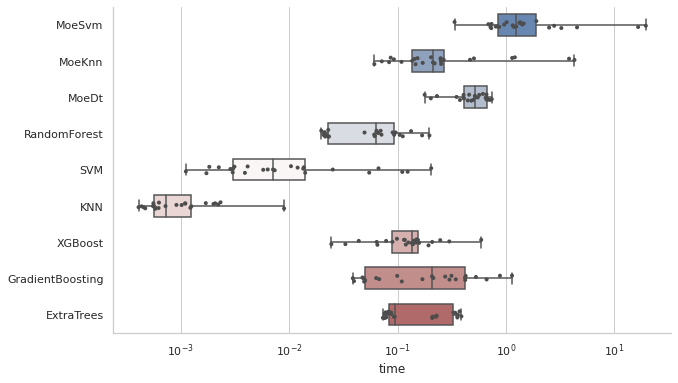

In [52]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="time", y="method", data=running_times,
            whis=[0, 100], width=.6, palette="vlag");

# Add in points to show each observation
sns.stripplot(x="time", y="method", data=running_times,
              size=4, color=".3", linewidth=0);
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=False, left=False);